In [408]:
#Import libraries 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np






In [409]:
#Import EMG Dataset
X = np.genfromtxt('traing_matrix05.csv', delimiter=',', skip_header=2)
X1 = np.genfromtxt('test_matrix05.csv', delimiter=',', skip_header=2)

m,n = np.shape(X)

x_train = []
y_train = [] 
x_test = []
y_test = []


#Split data x_train, y_train
x_train = X[:,0:n-7]
y_train = X[:,65:71]


#Test data 
x_test = X1[:,0:n-7]
y_test = X1[:,65:71]

y_class_test=X1[:,64]

In [410]:
print(np.shape(x_test))

(240, 64)


In [411]:
from sklearn.cluster import AgglomerativeClustering
clus=6
#cluster=[]
clusters=[]
cx1=[]
cy1=[]

for f in range(len(x_test)):
    #cluster.append([])
    cx1.append([])
    cy1.append([])
    clusters.append([])
    xx1_train=np.vstack((x_train,x_test[f,:]))
    cluster = AgglomerativeClustering(n_clusters=clus, affinity='euclidean', linkage='ward')
    clusters[f]=cluster.fit_predict(xx1_train)


    for i in range (0,clus):
        cx1[f].append([])
        cy1[f].append([])
        h=0
        for j in range (len(clusters[f])-1):
            
            if clusters[f][j]==i:
                cx1[f][i].append([])
                cy1[f][i].append([])
                cx1[f][i][h]=x_train[j,:]
                cy1[f][i][h]=y_train[j,:]
                h=h+1
    



In [412]:
print(clusters[0])

[0 1 1 5 2 1 0 1 5 2 1 1 0 4 1 5 2 3 0 1 5 2 3 3 4 1 1 4 4 1 4 4 4 4 1 1 0
 4 1 5 2 3 0 1 2 2 3 3 0 4 3 5 2 3 0 3 5 2 3 3 0 4 1 5 5 1 2 1 5 2 1 1 0 1
 3 5 2 3 0 3 5 2 3 3 0 0 1 5 5 1 0 1 5 5 1 1 0 4 1 5 2 1 0 1 5 2 3 3 0 3 4
 2 2 4 0 1 2 2 3 3 0 4 1 2 2 3 0 1 5 2 3 3 0 4 1 5 2 3 0 3 5 2 3 3 0 0 1 2
 2 1 0 1 2 2 3 3 0 4 1 2 2 3 0 1 5 2 3 3 0 4 1 2 2 3 0 1 2 2 3 3 0 4 1 2 2
 3 0 1 2 2 3 3 4 4 1 5 2 3 0 1 5 2 3 3 0 0 0 5 0 1 0 1 5 0 1 1 0 4 1 5 2 3
 0 1 5 2 3 3 4 4 1 5 2 1 0 1 5 2 3 3 0 1 1 5 2 1 0 1 5 2 1 1 0 4 1 5 2 3 2
 1 5 2 3 3 0 4 1 5 2 3 2 1 5 2 3 3 0 4 1 5 2 1 0 1 5 2 1 1 0 4 1 5 2 3 3 1
 2 2 1 1 0 4 1 5 2 1 0 1 5 2 1 1 0 3 1 2 2 3 0 1 2 2 3 3 0 4 2 2 5 5 3 4 2
 2 5 3 0 4 1 2 2 3 0 1 5 2 3 3 0 4 1 5 2 4 0 1 5 2 1 1 0 3 1 5 2 3 0 1 2 2
 3 3 0 4 1 2 2 3 1 4 1 5 2 3 0 4 1 5 2 3 0 1 5 2 3 3 0 4 1 5 2 1 0 1 5 2 1
 1 0 4 1 5 2 3 3 1 5 2 3 3 0 4 1 2 2 3 0 1 2 2 3 3 3 4 1 5 2 3 3 3 5 2 3 3
 0 4 1 5 2 3 0 1 5 2 3 3 0 1 1 5 2 1 0 1 5 2 1 1 3 1 1 2 4 4 4 4 2 4 4 4 0
 0 1 2 2 1 0 4 2 2 2 1 0 

In [413]:
prob1=[]
for f in range(len(x_test)):
    prob1.append([])
    for i in range (0, clus):
        prob1[f].append([])
        prob1[f][i]= np.sum(cy1[f][i],axis=0)/np.sum(np.sum(cy1[f][i],axis=0),axis=0)
    

In [414]:
cy_prob1=[]
cy_pred=[]
cy1_binary=[]

for f in range(len(x_test)):
    cy_prob1.append([])
    cy1_binary.append([])
    c_train=clusters[f][-1]
    cy_prob1[f]=prob1[f][c_train]
    
    
    for i in range (0,clus):
        cy1_binary[f].append([])
        cy1_binary[f][i]=[1 if x == max(prob1[f][i]) else 0 for x in prob1[f][i]]
        
        
       # for j in range (len(clusters[f])-1):
#check for any of equal probability
db=[]
for f in range (len(x_test)):
    cy_pred.append([])
    c_train=clusters[f][-1]
    cy_pred[f]=cy1_binary[f][c_train]
    if np.sum(cy1_binary[f]) != 6:
        db.append([f])
        
#db = 117 and 170 have double probability
cy1_binary[117][5][3]=0
cy1_binary[170][3][3]=0
       

In [415]:
print(np.asarray(cy_pred[0]))
print(y_test[0])
print(cy_pred[200]-y_test[200])
print(np.sum(cy1_binary))

print(prob1[0][4])
print(db)
print(cy1_binary[170])


[1 0 0 0 0 0]
[1. 0. 0. 0. 0. 0.]
[ 0.  0. -1.  1.  0.  0.]
1440
[0.07246377 0.72463768 0.05797101 0.04347826 0.04347826 0.05797101]
[[117], [170]]
[[0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]


In [394]:
mat=[]
error=0
for f in range(len(x_test)):
    mat.append([])
    
    for i in range (0,6):
        mat[f].append([])
        mat[f][i]=y_test[f][i]-cy_pred[f][i]
        if mat[f][i] != 0:
            error=error+1
error=error/2/len(y_test)  #divide by two because every miss increases error by 2

    
    

In [395]:
print(error)
print(miss)
print(len(x_test))

0.55
0
240


In [400]:
#confusion Matrix
confu=np.zeros([6,6])
for f in range (len(x_test)):
    
    for i in range (0,6):
        
        for j in range (0,6):
            if mat[f][j]==-1:
                if mat[f][i]==1:
                    confu[i][j]=confu[i][j]+1
for f in range (len(x_test)):
    for j in range (0,6):
        if y_test[f][j]==1:
            if cy_pred[f][j]==1:
                confu[j][j]=confu[j][j]+1
confu_per=np.around((confu/(len(y_test)/6)*100),decimals=2) #confusion matrix in percentage
                

In [404]:
print(confu)
print('-------------------------------')
print(confu_per)



[[29.  2.  1.  5.  0.  3.]
 [ 4.  9. 24.  2.  0.  1.]
 [ 0.  1.  9. 29.  1.  0.]
 [ 1.  0.  2. 36.  1.  0.]
 [ 0.  1.  8. 11.  0. 20.]
 [ 0.  1. 11.  3.  0. 25.]]
-------------------------------
[[72.5  5.   2.5 12.5  0.   7.5]
 [10.  22.5 60.   5.   0.   2.5]
 [ 0.   2.5 22.5 72.5  2.5  0. ]
 [ 2.5  0.   5.  90.   2.5  0. ]
 [ 0.   2.5 20.  27.5  0.  50. ]
 [ 0.   2.5 27.5  7.5  0.  62.5]]


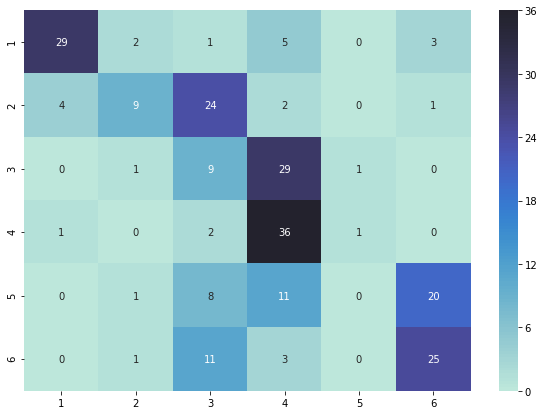

In [419]:

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confu, index = [i for i in "123456"],
                  columns = [i for i in "123456"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, center = 40)

In [235]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [248]:
plot_confusion_matrix(y_test, cy_pred, classes=['0' '1' '2' '3' '4' '5'],normalize=True, title='Normalized confusion matrix')

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass-multioutput targets